Algoritmo Perceptron in python:

In [ ]:
import numpy as np

In [2]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self,X,y):
        '''
        inizializza i dati di addestramento
        '''
        rgen=np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        '''Calcola l'input della rete ovvero la combinazione lineare z'''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        '''Ritorna l'etichetta della classe dopo l'iterazione '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class AdalineGD(object):
    '''
    Implementazione di Adaline con Discesa del gradiente
    '''
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        '''
        inizializza i dati di addestramento
        '''
        rgen=np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.00
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        '''Calcola l'input della rete ovvero la combinazione lineare z'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        '''Compute linear activation'''
        return X
    def predict(self, X):
        '''Ritorna l'etichetta della classe dopo l'iterazione '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [15]:
class AdalineSGD(object):
    '''
    Implementazione di Adaline con Discesa del gradiente stocastica
    '''
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.random_state = random_state
        self.shuffle = shuffle
    def fit(self,X,y):
        '''
        inizializza i dati di addestramento
        '''
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) /len(y)
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self, X, y):
        '''Addestra i dati senza reinizializzare i pesi'''
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi,target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(xi, target)
        return self
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size = 1 + m)
        self.w_initialized = True
    def _update_weights(self, xi, target):
        '''Applicazione della regola di aggiornamento dei pesi di Adaline'''
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    def net_input(self, X):
        '''Calcola l'input della rete ovvero la combinazione lineare z'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        '''Compute linear activation'''
        return X
    def predict(self, X):
        '''Ritorna l'etichetta della classe dopo l'iterazione '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [6]:

def plot_decision_regions(X, y, classifier, resolution=0.2):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors =  ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [7]:

s = os.path.join('https://archive.ics.uci.edu','ml','machine-learning-databases','iris','iris.data')
print('URL: ',s)
df = pd.read_csv(s, header=None, encoding='utf-8')
print(df.tail())
#seleziona i fiori setosa e versicolor delle prime 100 etichette
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
#estrai la lunghezza del petalo e del sepalo
X = df.iloc[0:100, [0, 2]].values

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


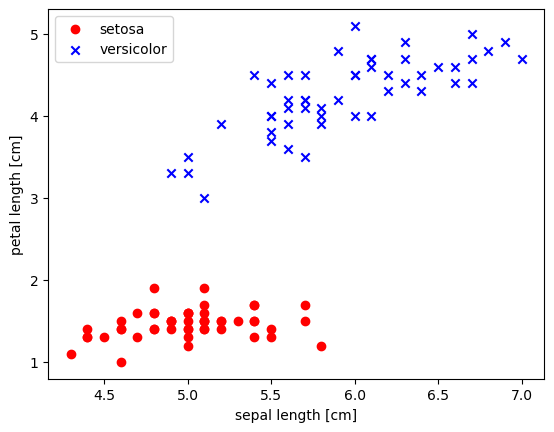

In [10]:

#plot data
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()



In [11]:

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)


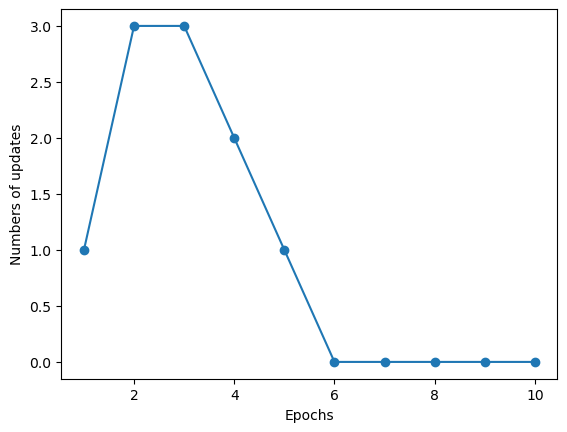

In [12]:

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Numbers of updates')
plt.show()



/var/folders/6n/zvn0crt118q2lq88xndkk6040000gn/T/ipykernel_10953/786442811.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


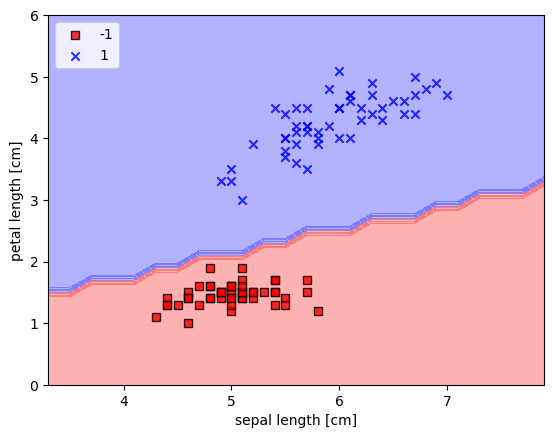

In [13]:

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [8]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

/var/folders/6n/zvn0crt118q2lq88xndkk6040000gn/T/ipykernel_10953/786442811.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


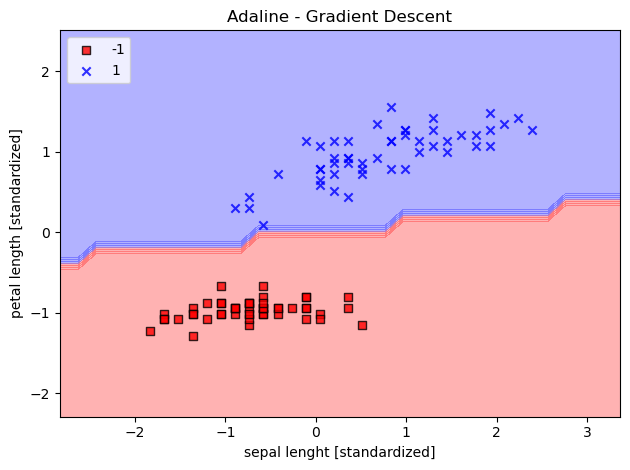

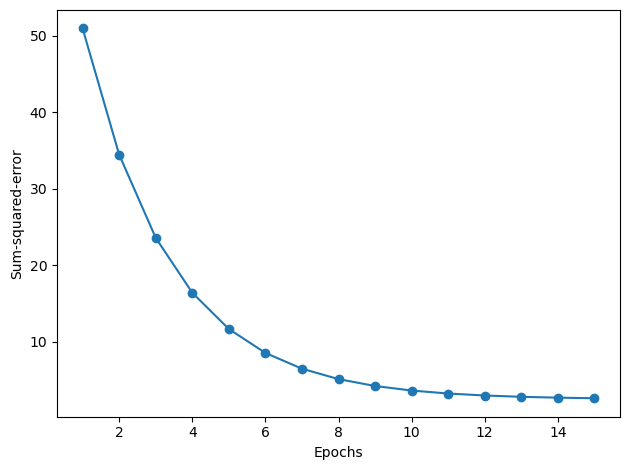

In [9]:
ada_gd = AdalineGD(n_iter = 15, eta = 0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal lenght [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

/var/folders/6n/zvn0crt118q2lq88xndkk6040000gn/T/ipykernel_10953/786442811.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


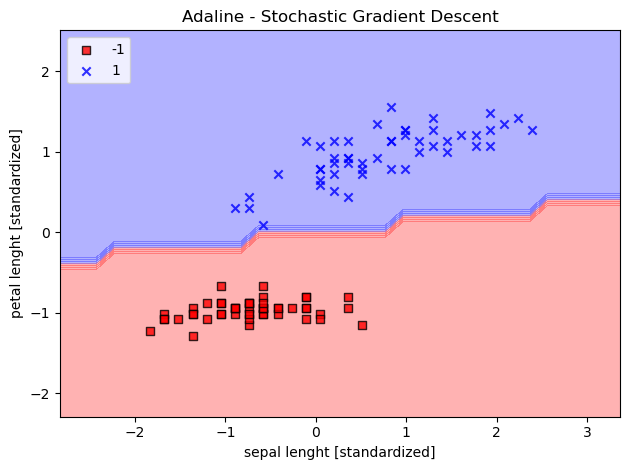

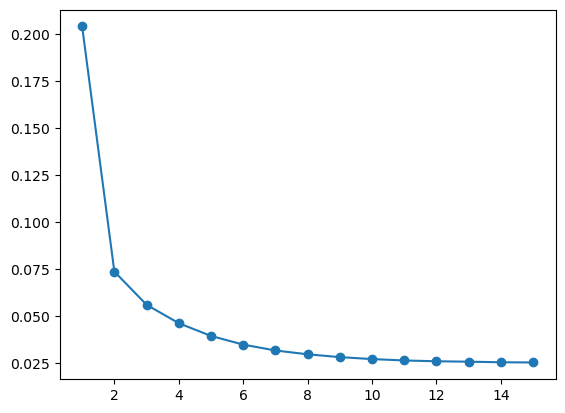

In [17]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal lenght [standardized]')
plt.ylabel('petal lenght [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker = 'o')